### Step 1: Split the dataset into training and testing sets

In [1]:
# Create Annotation File from the dataset
from utils.create_dataset import create_annotation_file

fp = "./../data_folder/"
create_annotation_file(fp)

100%|██████████| 4/4 [00:00<00:00, 5121.25it/s]


In [2]:
# Split the data using the annotation file
from utils.create_dataset import split_data

split_data('../dataset/annotations.csv')

### Step 2: Exploratory Data Analysis

<Axes: xlabel='type'>

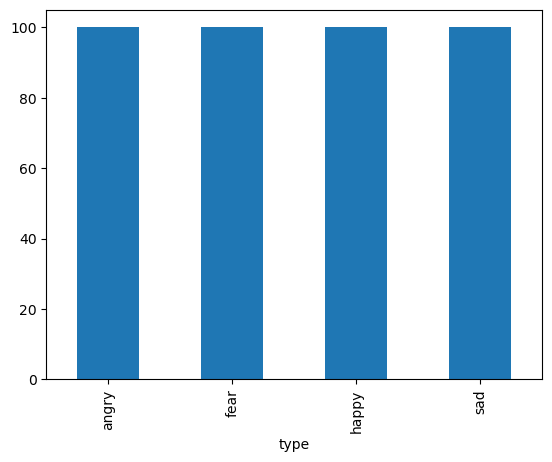

In [3]:
# Display data distributions using bar graph
from utils.create_dataset import get_annotations

df = get_annotations('../dataset/annotations.csv')
types = df.groupby('type')['filename'].count()
types.plot.bar(x='type', y='instances')

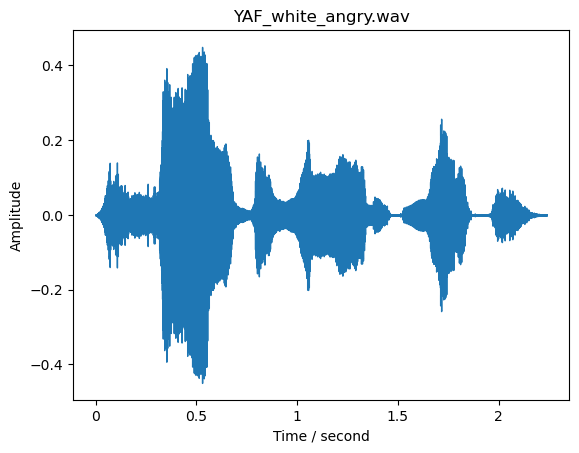

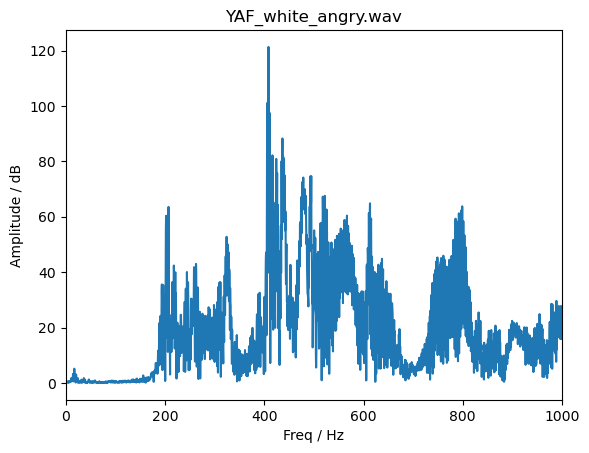

In [4]:
# Display sample audio file

from utils.data_visulization import plot_waveform, plot_frquency
from utils.create_dataset import get_annotations
import librosa
from IPython.display import Audio

df = get_annotations('../dataset/annotations.csv')
sample = df.sample(n=1)
sample_path = sample['filepath'].values[0]
sample_name = sample['filename'].values[0]

y, sr = librosa.load(sample_path)
fig = plot_waveform(y, sr, sample_name)
plot_frquency(y, sr, sample_name)

# Audio playback
Audio(data=y, rate=sr)

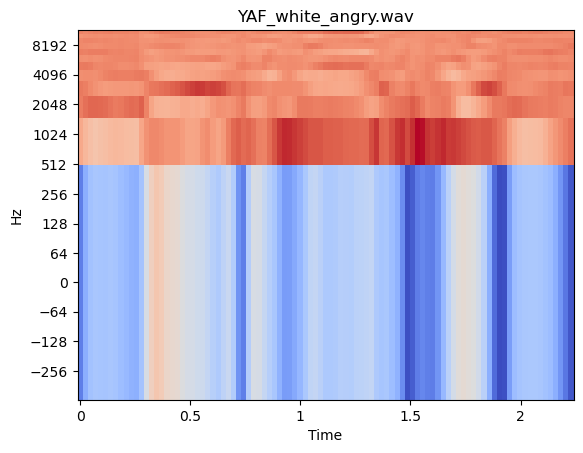

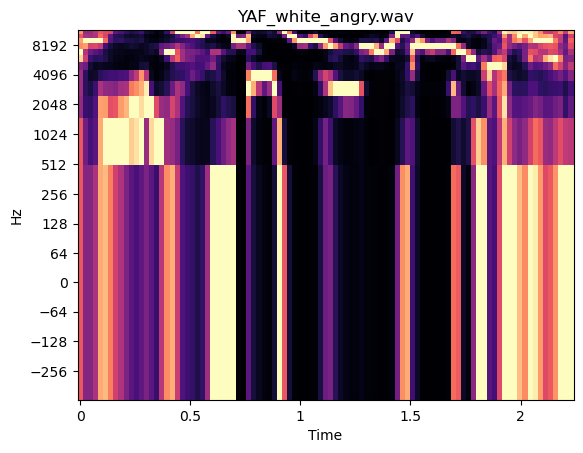

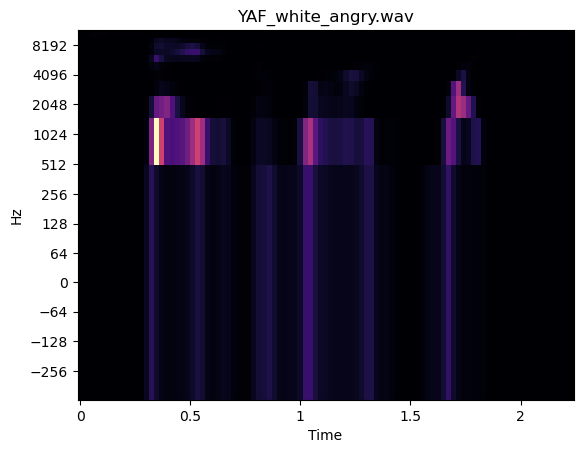

In [5]:
# Plot audio features
from utils.data_visulization import plot_chromagram, plot_mel_spectrogram, plot_mfcc

plot_mfcc(y, sr, sample_name)
plot_chromagram(y, sr, sample_name)
plot_mel_spectrogram(y, sr, sample_name)

### Step 3: Acoustic Feature Extraction

In [6]:
# Example feature matrix generation for one sample waveform

from utils.feature_extraction import generate_feature_matrix, get_chromagram, get_melspectrogram, get_mfccs
import librosa

y, sr = librosa.load('../dataset/train/angry/YAF_met_angry.wav', sr=32000, duration=5)
df_melspect, mel_spectogram = get_melspectrogram(y, sr)
df_chroma, chromagram = get_chromagram(y, sr)
df_mfccs, mfccs = get_mfccs(y, sr)

feature_matrix = generate_feature_matrix(df_melspectrogram=df_melspect, df_chroma=df_chroma, df_mfccs=df_mfccs)
print(feature_matrix)

      MFCC_1    MFCC_2    MFCC_3    MFCC_4    MFCC_5    MFCC_6    MFCC_7  \
0  -0.117572 -0.099665 -0.093175 -0.091428 -0.088513 -0.090162 -0.090367   
1  -0.003118 -0.010302 -0.015718 -0.018532 -0.020201 -0.018969 -0.016464   
2  -0.000212 -0.001801 -0.001028  0.000904  0.001195  0.002156 -0.001253   
3   0.011672  0.015781  0.015596  0.012066  0.009580  0.007273  0.002815   
4  -0.005433 -0.011200 -0.014657 -0.015181 -0.014023 -0.012714 -0.010846   
5   0.006254  0.007834  0.009775  0.013572  0.014532  0.013716  0.013517   
6  -0.001155 -0.004417 -0.006861 -0.007301 -0.009118 -0.009912 -0.008601   
7  -0.001294  0.001038  0.003488  0.007229  0.010806  0.011822  0.012257   
8   0.000675 -0.001209 -0.001489 -0.003299 -0.004693 -0.005013 -0.004943   
9   0.001651  0.002463  0.003072  0.003845  0.005178  0.006141  0.007362   
10 -0.000427 -0.000372 -0.001276 -0.001369 -0.001895 -0.001553 -0.000820   
11 -0.003599 -0.001019  0.001579  0.002942  0.003359  0.004190  0.004818   

      MFCC_

### Step 4: Feature Post Processing

In [7]:
from utils.feature_extraction import generate_feature_matrix, get_chromagram, get_melspectrogram, get_mfccs
import librosa
import numpy as np
import os
from tqdm import tqdm

# Create Feature vectors for training and testing sets

# Training set
train_path = './../dataset/train/'

types = []
features = []
for type in os.listdir(train_path):
    if type == 'train_feature_vector.csv': 
        continue
    
    for wf in tqdm(os.listdir(train_path + type)):
        wf_path = f'./../dataset/train/{type}/{wf}'

        y, sr = librosa.load(wf_path, sr=32000, duration=5)
        df_melspect, mel_spectogram = get_melspectrogram(y, sr)
        df_chroma, chromagram = get_chromagram(y, sr)
        df_mfccs, mfccs = get_mfccs(y, sr)

        feature_matrix = generate_feature_matrix(df_melspectrogram=df_melspect, df_chroma=df_chroma, df_mfccs=df_mfccs)

        types.append(type)
        features.append(feature_matrix.values)
        
        # print(feature_matrix)

train_feature_vector = features
train_types_vector = types

100%|██████████| 70/70 [00:01<00:00, 46.28it/s]


In [8]:
# Create Feature vectors for training and testing sets

# Testing set
test_path = './../dataset/test/'

types = []
features = []
for type in os.listdir(test_path):
    if type == 'test_feature_vector.csv': 
        continue

    for wf in tqdm(os.listdir(test_path + type)):
        wf_path = f'./../dataset/test/{type}/{wf}'

        y, sr = librosa.load(wf_path, sr=32000, duration=5)
        df_melspect, mel_spectogram = get_melspectrogram(y, sr)
        df_chroma, chromagram = get_chromagram(y, sr)
        df_mfccs, mfccs = get_mfccs(y, sr)

        feature_matrix = generate_feature_matrix(df_melspectrogram=df_melspect, df_chroma=df_chroma, df_mfccs=df_mfccs)

        types.append(type)
        features.append(feature_matrix.values)
        
        # print(feature_matrix)

test_feature_vector = features
test_types_vector = types

100%|██████████| 30/30 [00:00<00:00, 49.49it/s]


In [9]:
# Define train and test sets

# Train
X_train = train_feature_vector
y_train = train_types_vector

# Test
X_test = test_feature_vector
y_test = test_types_vector


# apply standard scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Train
X_train = np.asanyarray(X_train)
y_train = np.asanyarray(y_train)
print(X_train.shape)

X_train = np.reshape(X_train, (X_train.shape[0], -1))
print(X_train.shape)

X_train = sc.fit_transform(X_train)

# Test
X_test = np.asanyarray(X_test)
y_test = np.asanyarray(y_test)
print(X_test.shape)

X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_test.shape)

X_test = sc.transform(X_test)

(280, 12, 36)
(280, 432)
(120, 12, 36)
(120, 432)


In [10]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [11]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

In [12]:
# Support Vector Machine
from sklearn import svm

svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

svm_rbf_pred = svm_rbf.predict(X_test)

### Step 6: Model Evaluation

              precision    recall  f1-score   support

       angry       0.94      0.97      0.95        30
        fear       0.96      0.87      0.91        30
       happy       1.00      0.97      0.98        30
         sad       0.91      1.00      0.95        30

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

Accuracy: 0.95000


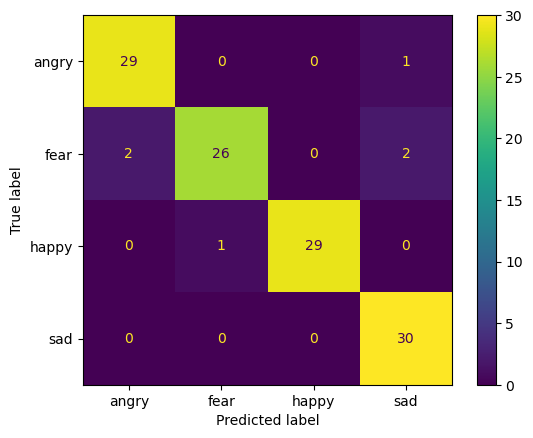

In [13]:
# Model Evaluation for KNN
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

results = classification_report(y_test, knn_pred)
print(results)

accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy: %.5f" % accuracy)

predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

              precision    recall  f1-score   support

       angry       0.93      0.93      0.93        30
        fear       1.00      0.87      0.93        30
       happy       0.97      1.00      0.98        30
         sad       0.91      1.00      0.95        30

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

Accuracy: 0.95000


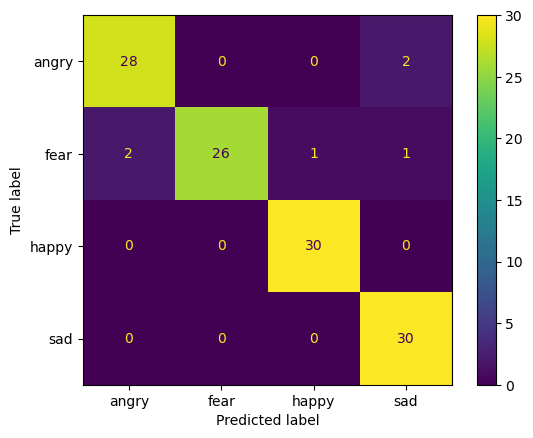

In [14]:
# Model Evaluation for Random Forest

results = classification_report(y_test, rf_pred)
print(results)

accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy: %.5f" % accuracy)

predictions = rf.predict(X_test)
cm = confusion_matrix(y_test, rf_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

              precision    recall  f1-score   support

       angry       0.93      0.90      0.92        30
        fear       0.90      0.90      0.90        30
       happy       1.00      0.97      0.98        30
         sad       0.94      1.00      0.97        30

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

Accuracy: 0.94167


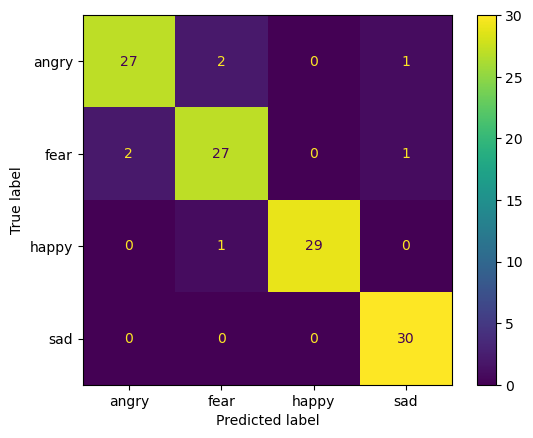

In [15]:
# Model Evaluation for SVM

results = classification_report(y_test, svm_rbf_pred)
print(results)

accuracy = accuracy_score(y_test, svm_rbf_pred)
print("Accuracy: %.5f" % accuracy)

predictions = rf.predict(X_test)
cm = confusion_matrix(y_test, svm_rbf_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf.classes_)
disp.plot()